`Programmed By : Rithik Tripathi`

[Connect with me on Linkedin](https://www.linkedin.com/in/rithik-tripathi-data-scientist/)

In this notebook, We will see what are the problems of Linear Regression and Why do we need `Regularisation`

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

> we will make a dataframe which could mimic a Sine curve 

In [2]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [3]:
#Setting seed for reproducability
np.random.seed(10)  

In [4]:
#Defining the target/dependent variable as sine of the independent variable

# y = sin(x) + SOME NOISE BEING ADDED ON TOP OF IT
y_sin_noise = np.sin(x) + np.random.normal(0,0.15,len(x))
y_pure_sin = np.sin(x)

del_y = y_sin_noise - y_pure_sin

C:\Users\rkt7k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

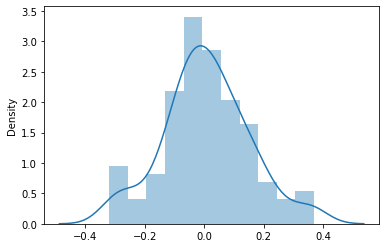

In [5]:
import seaborn as sns
sns.distplot(del_y, hist=True)

# we can see the errors being generated from noise form a normal distribution

In [6]:
#Creating the dataframe using independent and dependent variable
sin_df = pd.DataFrame(np.column_stack([x,y_sin_noise]),columns=['x','y'])

In [7]:
sin_df.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


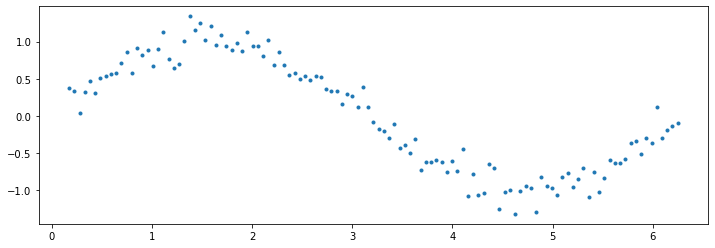

In [8]:
# sine curve with noise added 

#Plotting the dependent and independent variables
plt.figure(figsize=(12,4))
plt.plot(sin_df['x'],sin_df['y'],'.')

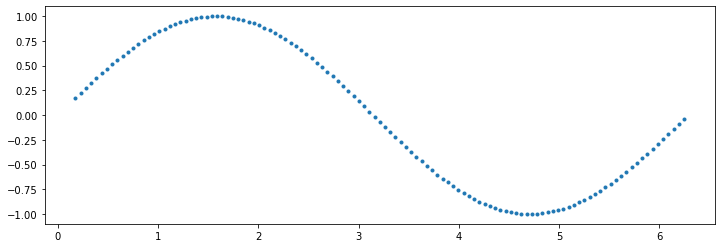

In [9]:
# this is how the pure sine column plot appears : without noise

#Plotting the dependent and independent variables
plt.figure(figsize=(12,4))
plt.plot(sin_df['x'],y_pure_sin,'.')

In [10]:
# using polynomial regression from power 1 to 15
for i in range(2,16): #power of 1 is already there, hence starting with 2
    col_name = 'x_%d'%i # generating column name with the respective power 
    sin_df[col_name] = sin_df['x']**i
    
sin_df.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


### Creating Train & Test set Randomly

In [11]:
sin_df['y_pure_sin'] = y_pure_sin 

# allocating random int to each record and if it is <3 => train & >3 => test
# this is just a fancy way of doing train test split, nothing else
sin_df['randNumCol'] = np.random.randint(1, 6, sin_df.shape[0])
sin_df.head()
train=sin_df[sin_df['randNumCol']<=3]
test=sin_df[sin_df['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

In [12]:
sin_df.randNumCol.value_counts()
# we can see the distribution is almost same

1    28
3    26
5    22
4    22
2    19
Name: randNumCol, dtype: int64

#### Implementing Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
y_sin_train = train['y_pure_sin'].values

X_test = test.drop('y', axis=1).values
y_test = test['y'].values
y_sin_test = test['y_pure_sin'].values

Train Error  0.21314430958173897
Test Error  0.18974033118165387


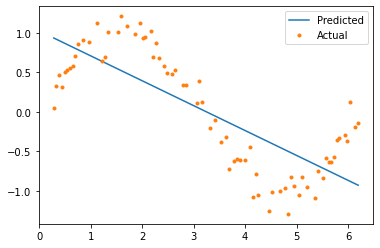

In [15]:
#Linear regression with one features

# on TRAINING SET
independent_variable_train = X_train[:,0:1] # this is array slicing => slicing only 1st feature from all components

lr = LinearRegression(normalize=True)
lr.fit(independent_variable_train, y_train)
y_train_pred = lr.predict(independent_variable_train)

from sklearn.metrics import mean_squared_error as mse
mse_train = mse(y_train_pred, y_train)

# ON TESTING SET
independent_variable_test = X_test[:,0:1] 
y_test_pred = lr.predict(independent_variable_test)
mse_test = mse(y_test_pred, y_test)

# printing results
print("Train Error ", mse_train)
print("Test Error ", mse_test)

# plotting scores
plt.plot(X_train[:,0:1], y_train_pred, label = 'Predicted')
plt.plot(X_train[:,0:1], y_train, '.', label = 'Actual')
plt.legend()

As we are using only one feature to predict, the output is a stringht line

#### This demonstrates that our model is a `UNDERFITTED` model, as its not able to capture the relationship as seen above

Train Error  0.02147248177096577
Test Error  0.03045187888196913


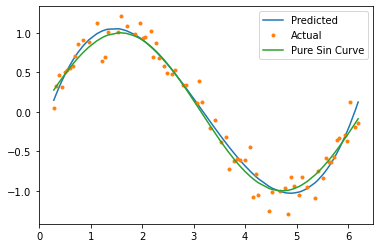

In [16]:
# performing the same task as above but with 3 features


# on TRAINING SET
independent_variable_train = X_train[:,0:3] # this is array slicing => slicing only 1st feature from all components

lr = LinearRegression(normalize=True)
lr.fit(independent_variable_train, y_train)
y_train_pred = lr.predict(independent_variable_train)

from sklearn.metrics import mean_squared_error as mse
mse_train = mse(y_train_pred, y_train)

# ON TESTING SET
independent_variable_test = X_test[:,0:3] 
y_test_pred = lr.predict(independent_variable_test)
mse_test = mse(y_test_pred, y_test)

# printing results
print("Train Error ", mse_train)
print("Test Error ", mse_test)

# plotting scores
plt.plot(X_train[:,0:1], y_train_pred, label = 'Predicted')
plt.plot(X_train[:,0:1], y_train, '.', label = 'Actual')
plt.plot(X_train[:,0:1], y_sin_train, label = 'Pure Sin Curve')
plt.legend()

Train Error  0.019095054809245043
Test Error  0.027717292848481637


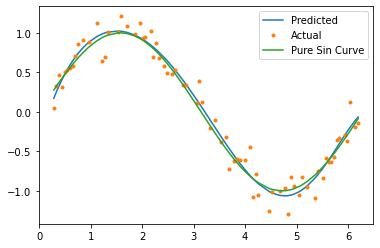

In [17]:
# performing the same task as above but with 7 features


# on TRAINING SET
independent_variable_train = X_train[:,0:7] # this is array slicing => slicing only 1st feature from all components

lr = LinearRegression(normalize=True)
lr.fit(independent_variable_train, y_train)
y_train_pred = lr.predict(independent_variable_train)

from sklearn.metrics import mean_squared_error as mse
mse_train = mse(y_train_pred, y_train)

# ON TESTING SET
independent_variable_test = X_test[:,0:7] 
y_test_pred = lr.predict(independent_variable_test)
mse_test = mse(y_test_pred, y_test)

# printing results
print("Train Error ", mse_train)
print("Test Error ", mse_test)

# plotting scores
plt.plot(X_train[:,0:1], y_train_pred, label = 'Predicted')
plt.plot(X_train[:,0:1], y_train, '.', label = 'Actual')
plt.plot(X_train[:,0:1], y_sin_train, label = 'Pure Sin Curve')
plt.legend()

### Defining a function to automate this process and iterate th. range of features and plot results

In [18]:
def check_features_vs_result(train_x, train_y, test_x, test_y, features, models_to_plot):
    
    '''
    Takes input train and test dataset, features and a dictionary with number of features to plot with respective plot location
    and returns train v/s test results plot to better understand the overfitting / underfitting results.
    
    Params : 
    	train_x : training data
        train_y : training target feature
        test_x : testing data
        test_y : testing target feature
        features : (int) number of features to consider while plotting 
        models_to_plot : dictionary : key -> number of features & value -> Plot location in subplot
        
    Returns : 
    	Respective train v/s test plot
    '''
    
    
    # fitting the model
    lr = LinearRegression(normalize=True)
    lr.fit(train_x, train_y)
    train_y_pred = lr.predict(train_x)
    test_y_pred = lr.predict(test_x)
    
    # checking features for which plot is to be made:
    if features in models_to_plot : 
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:, 0:1], train_y_pred)
        plt.plot(train_x[:, 0:1], train_y, '.')
        plt.title('Number of Predictors: %d'%features)
        
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    return_list = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    return_list.extend([rss_test])
        
    return_list.extend([lr.intercept_])
    return_list.extend(lr.coef_)
    
    return return_list
    


In [19]:
# Making DataFrame to store the results

col =  ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

# defining a dictionary to store subpolot locations for respective number of features
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

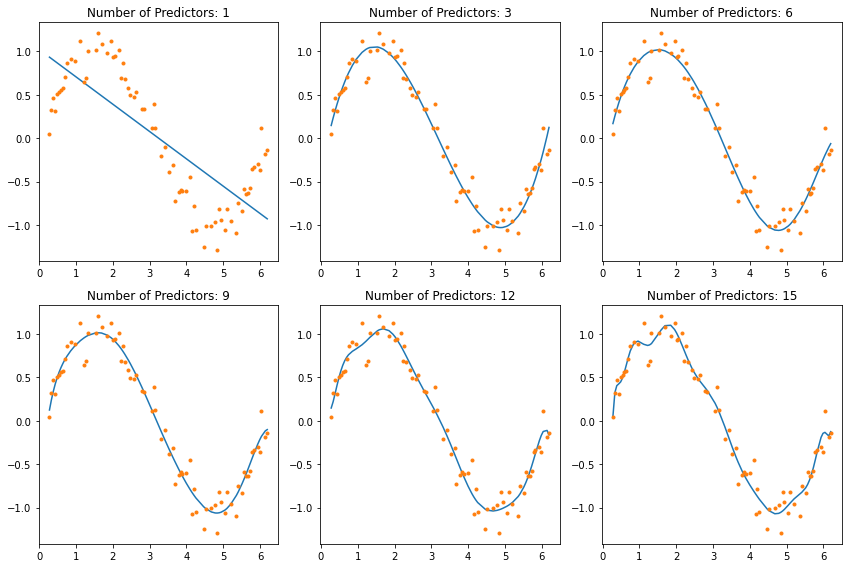

In [20]:
# Iterating through all powers of polynomial reg and storing results in the dataframe made above
plt.figure(figsize=(12,8))

for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test
    
    # row = i-1 because we need to start from 0th location
    # column = i+3 because there are somdefault columns like x and y axis
    coef_matrix_simple.iloc[i-1, 0:i+3] = check_features_vs_result(
    											train_x, train_y, test_x, test_y,
                                                features=i,
                                                models_to_plot=models_to_plot
    )

## Note : It is easily understood from above that initially the model was `Underfitted` as the number of features were less

## It starting understaing the sine pattery as number of features increased

## But when the features were given more & more, the model got `Overfitted` and Learned the noise present in data as well

In [21]:
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.213144,0.18974,1.022026,-0.314825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.211909,0.187095,1.108613,-0.394472,0.012378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021472,0.030452,-0.395777,2.211256,-0.985564,0.103652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021433,0.030495,-0.429469,2.297581,-1.042236,0.117041,-0.001036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.01977,0.023449,-0.096495,1.196542,0.008412,-0.292937,0.068681,-0.00429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019096,0.027915,-0.402994,2.460917,-1.644525,0.655694,-0.197059,0.031391,-0.001837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019095,0.027717,-0.383432,2.364513,-1.484218,0.532799,-0.147927,0.020809,-0.000674,-0.000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.01877,0.031513,-0.848928,5.059678,-7.017272,5.985346,-3.076467,0.923889,-0.160126,0.01492,-0.000579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.018764,0.032176,-0.938864,5.654966,-8.466056,7.732466,-4.26288,1.406429,-0.279989,0.032718,-0.002029,0.00005,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018237,0.044286,-2.379595,16.259649,-38.022791,49.70171,-38.754405,18.930563,-5.952893,1.204084,-0.151285,0.010739,-0.000329,NaN,NaN,NaN,NaN,NaN


In [22]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,1,-0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,1.1,-0.39,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.4,2.2,-0.99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.43,2.3,-1,0.12,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.096,1.2,0.0084,-0.29,0.069,-0.0043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.4,2.5,-1.6,0.66,-0.2,0.031,-0.0018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.38,2.4,-1.5,0.53,-0.15,0.021,-0.00067,-5.1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.85,5.1,-7,6,-3.1,0.92,-0.16,0.015,-0.00058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.94,5.7,-8.5,7.7,-4.3,1.4,-0.28,0.033,-0.002,5e-05,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-2.4,16,-38,50,-39,19,-6,1.2,-0.15,0.011,-0.00033,NaN,NaN,NaN,NaN,NaN


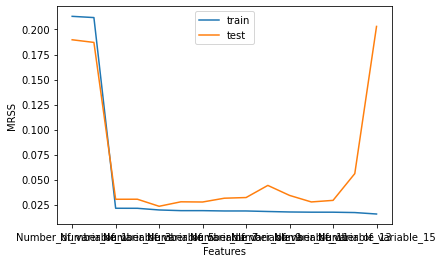

In [23]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

## Solution : Regularization Techniques